# Neural Network from Scratch
# Practical 3A

In [34]:
# creating the base layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [35]:
# creating the Dense layer

import numpy as np

class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)
        print ("Weights:",self.weights)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

In [36]:
# creating the activation layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [37]:
# creating the activation functions

# Tanh function
class Tanh(Activation):
    def __init__(self):

        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)



In [38]:
# creating the loss function
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative
def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [39]:

# creating the neural network

X = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
Y = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

network = [
    Layer_Dense(1, 1),
    Linear()
]

epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)
        # Backward pass
        output_gradient = mse_prime(y, output)
        for layer in reversed(network):
            output_gradient = layer.backward(output_gradient, learning_rate)

    if epoch % 1000 == 0:
        print("Epoch",epoch,"Error",error)

    
error/= len (X)
print ("-------------------------------------------")
print("Final error: ",error)

Weights: [[0.1927659]]
Epoch 0 Error 0.8221219976222407
Epoch 1000 Error 0.0057094022539284275
Epoch 2000 Error 0.0057094022539284275
Epoch 3000 Error 0.0057094022539284275
Epoch 4000 Error 0.0057094022539284275
Epoch 5000 Error 0.0057094022539284275
Epoch 6000 Error 0.0057094022539284275
Epoch 7000 Error 0.0057094022539284275
Epoch 8000 Error 0.0057094022539284275
Epoch 9000 Error 0.0057094022539284275
-------------------------------------------
Final error:  0.0008156288934183468


In [40]:
# testing the neural network

input_arr = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_arr = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

predicted_arr = np.array([])

for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        output = layer.forward(output)
    predicted_arr = np.append(predicted_arr,output)
    print("Input:",x,"Output:",output,"Actual:",y)
print ("-------------------------------------------")
print ("Predicted:",predicted_arr)
   


Input: [0.1] Output: [[1.19031205]] Actual: [1.2]
Input: [0.2] Output: [[1.386833]] Actual: [1.4]
Input: [0.3] Output: [[1.58335395]] Actual: [1.55]
Input: [0.4] Output: [[1.7798749]] Actual: [1.75]
Input: [0.5] Output: [[1.97639585]] Actual: [2.01]
Input: [0.6] Output: [[2.1729168]] Actual: [2.2]
Input: [0.7] Output: [[2.36943775]] Actual: [2.35]
-------------------------------------------
Predicted: [1.19031205 1.386833   1.58335395 1.7798749  1.97639585 2.1729168
 2.36943775]


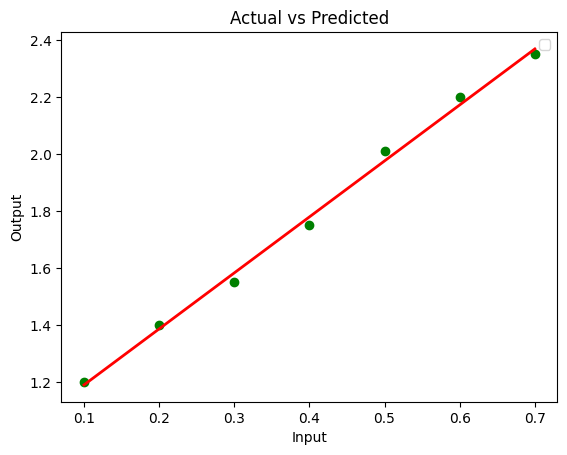

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Actual data
plt.scatter(input_arr, output_arr, color='green' )
# Predicted data
plt.plot(input_arr, predicted_arr, color='red', linewidth=2, label='Predicted')
# labels
plt.xlabel('Input')
plt.ylabel('Output')
# title
plt.title('Actual vs Predicted')
# show legend
plt.legend("")
plt.show()